In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
########## Updated list using the color-LogWimx correaltion
## after evaluating i-mag
I_maglim = [5807393, 5807403, 5057729, 5059653, 4126669, 5059227, 38803, 39181, 39431, 39619, 39655, 40005, 40107, 40147, 40588, 40604, 41567, 41829, 42768, 41440, 37814]
calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378]

## after adding evaluation based on W1-mag
I_maglim = [5807393, 5807403, 5057729, 5059653, 4126669, 5059227, 38803, 39181, 39431, 39619, 39655, 40005, 40107, 40147, 40588, 40604, 41567, 41829, 42768, 41440, 37814, 39344, 13756, 14548, 14590]
calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073]

In [3]:
table   = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

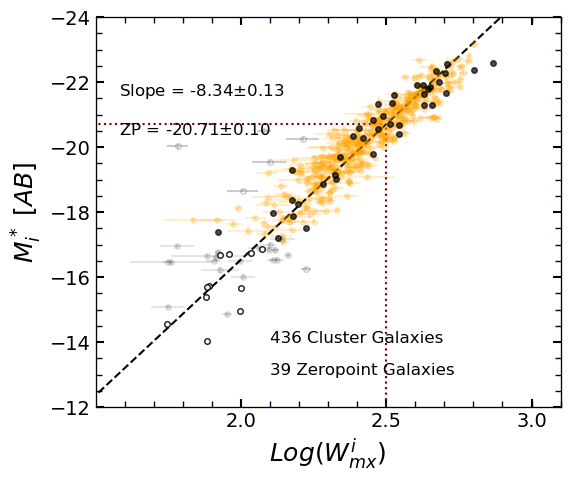

In [4]:
band = 'i'

fig, ax, Clusters, S_ZP, zp_calibs = makeTF(table, pgcFaint=I_maglim, calib_maglim=calib_maglim, 
                                 band=band, makePlot=True, 
                                            addSouth=False,
                                            getZPcalib=True)

In [5]:
slope = S_ZP[0]
slope_e = S_ZP[1]
zp    = S_ZP[2]
zp_e    = S_ZP[3]

print S_ZP

Clusters_orig = allCluster(table, band=band, pgcFaint=I_maglim)

[-8.34142508600705 0.13141989672434123 -20.706420848555236
 array([0.098804])]


[5807393, 5807403, 5057729, 5059653, 4126669, 5059227, 38803, 39181, 39431, 39619, 39655, 40005, 40107, 40147, 40588, 40604, 41567, 41829, 42768, 41440, 37814, 39344, 13756, 14548, 14590]
[3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073, 3974, 19871, 22277, 38148, 41020, 41093, 46127]


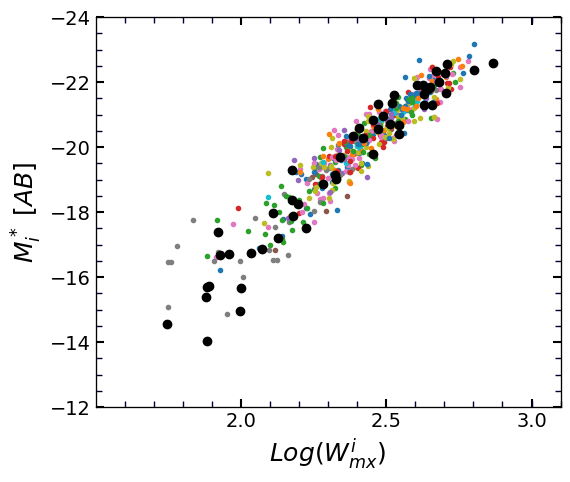

In [6]:
fig, ax = makeFig(band=band, xLim = (1.5,3.1), yLim = (-12,-24), MAGabs=True)

# I_maglim = []

for i, key in enumerate(Clusters):
    myCluster = Clusters[key]
    zp_ = myCluster['zp']
    zp    = zp_calibs['zp']
    pgc = myCluster['pgc']
    pgc_w = myCluster['pgc_w']
    mag_      = myCluster['mag']
    mag_w     = myCluster['mag_w']
    logWimx_  = myCluster['logWimx']
    offset=zp_-zp
    ax.errorbar(logWimx_, mag_-offset, fmt='.')
    
    for i, idd in enumerate(pgc):
        m = mag_[i]
        if m-offset > -17.:
            if not pgc[i] in I_maglim:
                I_maglim.append(pgc[i])
    for i, idd in enumerate(pgc_w):
        m = mag_w[i]
        if m-offset > -17.:
            if not pgc_w[i] in I_maglim:
                I_maglim.append(pgc_w[i])
                
print I_maglim


# calib_maglim = []
pgc = zp_calibs['pgc']
pgc_w = zp_calibs['pgc_w']
mag_      = zp_calibs['MAG']
mag_w     = zp_calibs['MAG_w']
logWimx_  = zp_calibs['logWimx']
ax.errorbar(logWimx_, mag_, fmt='o', color='black')

for i, idd in enumerate(pgc):
    m = mag_[i]
    if m > -16.1:
        if not pgc[i] in I_maglim:
            calib_maglim.append(pgc[i])
for i, idd in enumerate(pgc_w):
    m = mag_w[i]
    if m > -16.1:
        if not pgc_w[i] in I_maglim:
            calib_maglim.append(pgc_w[i])
            
print calib_maglim

In [7]:
d_lst = []
keys = []
for i, key in enumerate(Clusters):
        myCluster = Clusters[key]
        print key, myCluster['slope'], myCluster['zp'], Clusters_orig[key]['zp']-zp, Clusters_orig[key]['name']
        
        d_modulus = Clusters_orig[key]['zp']-zp
        d_lst.append(d_modulus)
        keys.append(key)

print 

indx  = np.argsort(d_lst)

for i in indx:
    key = keys[i]
    print key, '%.1f'%d_lst[i], Clusters_orig[key]['name']

NEST_200092 -8.34142508600705 12.39674044937345 32.94592705340085 Pegasus
NEST_200037 -8.34142508600705 13.714326976338338 34.48808194605063 NGC70
NEST_200005 -8.34142508600705 13.143706966734625 33.85537309212777 NGC410
NEST_200006 -8.34142508600705 13.06002430485306 33.761519394542134 NGC507
NEST_200012 -8.34142508600705 13.995310443829894 34.6968504928638 Abell 400
NEST_200003 -8.34142508600705 12.684284375908172 33.62751546430221 Abell 262
NEST_100001 -8.34142508600705 13.947494640913968 34.64887439110808 Coma
NEST_100002 -8.34142508600705 10.024807755797923 30.83868738296617 Virgo
NEST_100005 -8.34142508600705 13.913656041919115 34.61854365028292 Abell 1367
NEST_200045 -8.34142508600705 13.687494647460037 34.416066606982504 NGC80
NEST_100007 -8.34142508600705 15.071136591794621 35.766612717612894 Abell 2151 (Hercules)
NEST_200016 -8.34142508600705 14.41572509137834 35.13381992724842 Abell 2634/66
NEST_100008 -8.34142508600705 10.432967569618192 31.136067438621467 Ursa Major
NEST_1

In [8]:
def rmsMaker(logWimx, mag, logWimx_e, slope, zp):
    
    mag_fit = slope*(logWimx-2.5)+zp
    rms = np.sqrt(np.mean((mag-mag_fit)**2))
    
    logWimx_f = (mag-zp)/slope+2.5
    RMS = np.abs(slope*(np.sqrt(np.sum((logWimx-logWimx_f)**2/logWimx_e**2)/np.sum(1./logWimx_e**2))))
    
    return rms, RMS
    

Virgo (24) -7.36 0.44 10.13 0.09 10.02 0.09 0.70


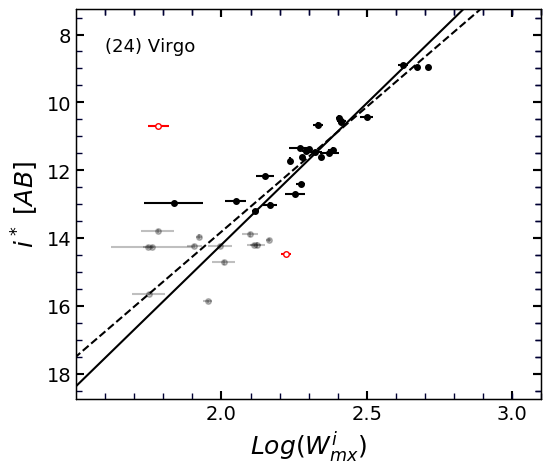

In [9]:
##########################################
def plotSingleCluster(key, xLim = (1.5,3.1), yLim = (18.75,7.25)):
#         key = 'NEST_100002'
    logWimx_, mag_, logWimx_e_, mag_e_ = plotCluster(ax, Clusters, nest=key, plotErrors=True, alpha=1., 
                        markersize=0, pgcFaint=I_maglim, plotWeird=True, color='k', 
                        alphaFaint=0.25, weirdColor='r', alphaWeird=1.)
    
    ## solid line, universal fit
    x = np.linspace(-5,5,50)
    y = slope*(x-2.5)+Clusters[key]['zp']
    ax.plot(x,y, 'k-')  
    
    
    ## dashed line, original fit
    y = Clusters_orig[key]['slope']*(x-2.5)+Clusters_orig[key]['zp']
    ax.plot(x,y, 'k--')  
    
    
    Sorig = Clusters_orig[key]['slope']
    Sorig_e = Clusters_orig[key]['slope_e']
    ZPorig = Clusters_orig[key]['zp']
    ZPorig_e = Clusters_orig[key]['zp_e']
    Zp_univ = Clusters[key]['zp']
    Zp_univ_e = Clusters[key]['zp_e']
    rms, RMS = rmsMaker(logWimx_, mag_, logWimx_e_, slope, Zp_univ)
    print Clusters_orig[key]['name'], '(%d)'%len(logWimx_), '%.2f'%Sorig, '%.2f'%Sorig_e, '%.2f'%ZPorig, '%.2f'%ZPorig_e, '%.2f'%Zp_univ, '%.2f'%Zp_univ_e, '%.2f'%rms
    
    
    ax.set_xlim(xLim)        
    ax.set_ylim(yLim)
    ax.tick_params(which='major', length=6, width=1.5, direction='in')
    ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')
    
    ax.set_xticks(np.arange(2, 3.5, step=0.5))
    
    if True:
        y_ax = ax.twinx()
        y_ax.set_ylim(yLim)
        y_ax.set_yticklabels([])
        y_ax.minorticks_on()
        y_ax.tick_params(which='major', length=6, width=1.5, direction='in')
        y_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')        

    if True:
        x_ax = ax.twiny()
        x_ax.set_xlim(xLim)
        x_ax.set_xticklabels([])
        x_ax.minorticks_on()
        x_ax.tick_params(which='major', length=6, width=1.5, direction='in')
        x_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')   
        x_ax.set_xticks(np.arange(2, 3.5, step=0.5))


    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(14) 
            
    ax.text(1.6,8.5, r''+"(%d)" % len(logWimx_)+' '+Clusters[key]['name'], fontsize=13)
    
##########################################    
    
    

fig, ax = makeFig(band=band, xLim = (1.5,3.1), yLim = (18.75,7.25))
plotSingleCluster('NEST_100002')

Virgo (24) -7.36 0.44 10.13 0.09 10.02 0.09 0.70
Ursa Major (36) -8.39 0.46 10.43 0.08 10.43 0.07 0.53
Pegasus (24) -9.27 1.15 12.24 0.23 12.40 0.11 0.59
Abell 262 (6) -6.54 1.65 12.92 0.29 12.68 0.23 0.71
NGC507 (20) -7.27 0.57 13.06 0.10 13.06 0.12 0.54
NGC410 (33) -8.10 0.58 13.15 0.08 13.14 0.08 0.52
Cancer (18) -8.15 0.82 13.29 0.11 13.29 0.11 0.48
NGC80 (14) -7.29 0.54 13.71 0.06 13.69 0.07 0.41
NGC70 (11) -9.32 1.26 13.78 0.15 13.71 0.10 0.35
Abell 1367 (68) -8.40 0.44 13.91 0.06 13.91 0.06 0.56
Coma (79) -8.68 0.40 13.94 0.06 13.95 0.06 0.56
Abell 400 (21) -7.95 0.48 13.99 0.06 14.00 0.06 0.58
NGC4065 (14) -8.51 0.50 14.25 0.09 14.26 0.08 0.40
Abell 2634/66 (29) -8.48 0.64 14.43 0.09 14.42 0.06 0.48
Abell 2151 (Hercules) (39) -8.20 0.49 15.06 0.07 15.07 0.06 0.42


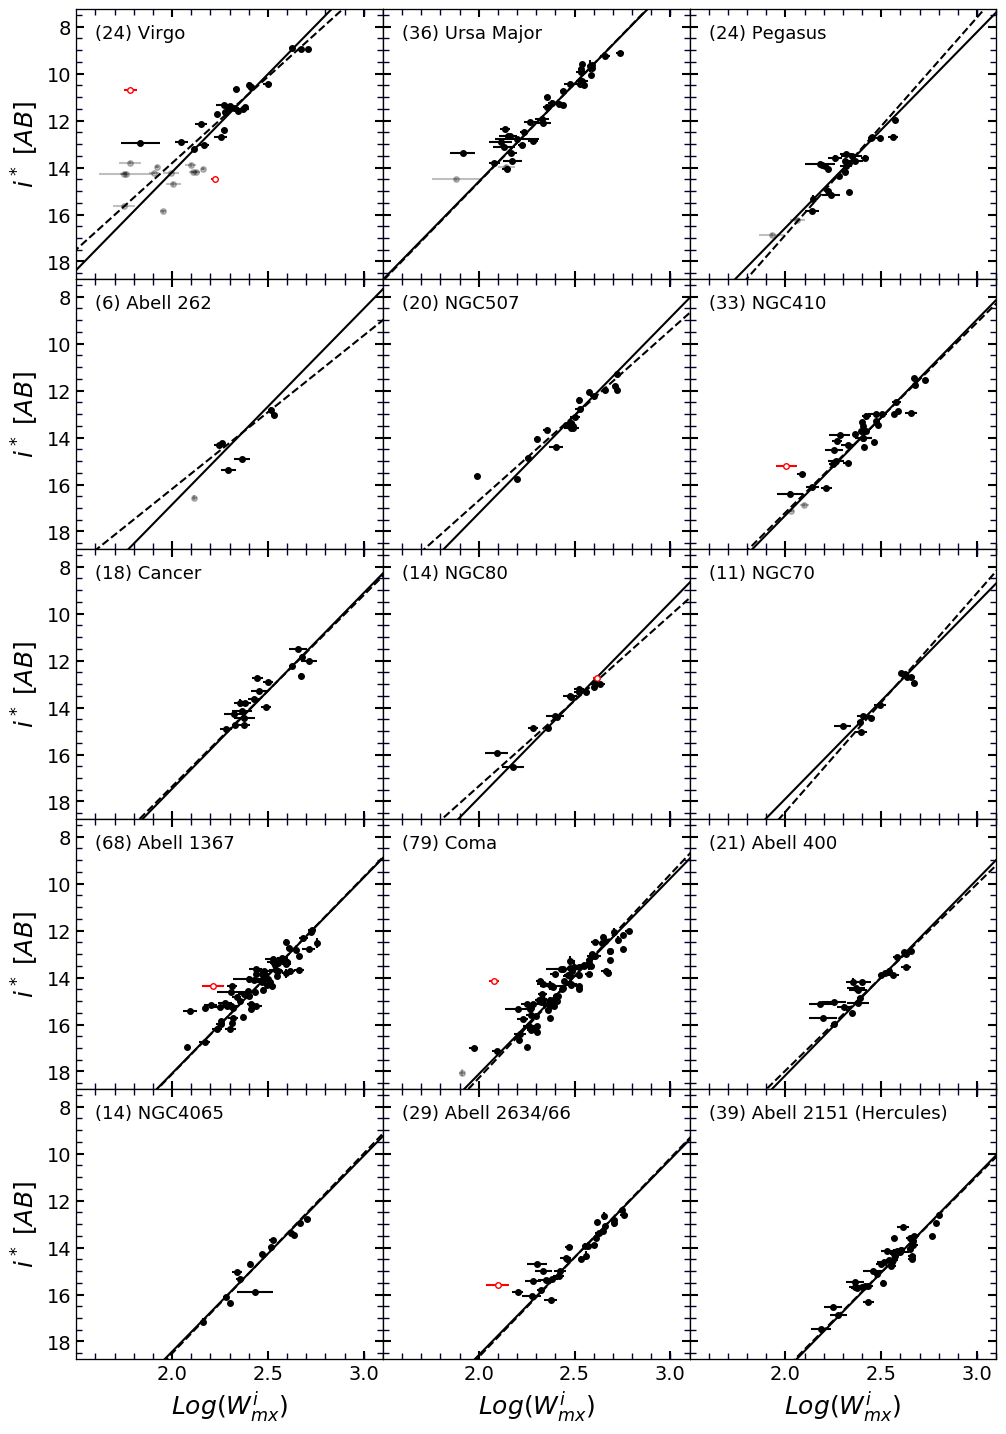

In [10]:
fig = py.figure(figsize=(10, 15), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.97, bottom=0.07, left=0.06, right=0.98)
gs = gridspec.GridSpec(5, 3); p=0


for i in indx:
    key = keys[i]
    ax = plt.subplot(gs[p])
    plotSingleCluster(key)
    
    if p%3==0: 
        ax.set_ylabel(r'$'+band+'^* \/\/ [AB]$', fontsize=18)
    else:
        plt.setp(ax.get_yticklabels(), visible=False) 
        
    if p>11: ax.set_xlabel(r'$Log( W_{mx}^i)$', fontsize=18) 
    p+=1

plt.subplots_adjust(hspace=.0, wspace=0)

In [11]:
myKeys = ['NEST_100002', 'NEST_100008', 'NEST_200092',  'NEST_200003', 'NEST_200005', 'NEST_200006', 'NEST_100030', 'NEST_200045', 'NEST_200037', 'NEST_100005', 'NEST_100001', 'NEST_200012', 'NEST_100018', 'NEST_200016', 'NEST_100007']

for key in myKeys:
    myCluster = Clusters[key]
    
    mag = myCluster['mag']
    pgc = myCluster['pgc']
    ix = []
    for i, id in enumerate(pgc):
        if not id in I_maglim:
            ix.append(i)  
    
    mags = mag[ix]
    jj = np.argsort(mags)
    
    print mags[jj][::-1][1]
    

    

13.03
13.81
15.33
14.91
16.14
15.65
14.75
15.94
14.8
16.74
17.02
15.72
16.34
16.05
16.89
